# Import required libraries

In [32]:
import numpy as np #for linear algebra
import pandas as pd #for data manipulation

import matplotlib.pyplot as plt #data visualization
import seaborn as sns #advanced visualiation

In [33]:
sns.set() #uses sns skins for matplotlib visualizations

# Read in new .csv as Pandas DataFrame

In [34]:
store = pd.read_csv('Store 7141 Raw Data (clean).csv')
store.head()

,Trans_id,Menu_id,Sand_id,Employees,Bread_CT,Cheese_CT,Protein_CT,Produce_CT,Wrap_CT,Payment_CT,...,Quality,Grade,Date,Time,DateTime,Month,Shift,Store,Sand,Size
0,7141.42739.4326,1,2,1,40,41,18,71,21,39,...,32,81,42739,0.4326,2017-01-04 10:22:56.640000000,January,Morning,7141,Cold Cut,12-inch
1,7141.42739.4535,6,2,1,45,43,21,52,19,51,...,18,73,42739,0.4535,2017-01-04 10:53:02.400000000,January,Morning,7141,Steak,12-inch
2,7141.42739.4556,4,1,1,80,32,25,16,17,27,...,32,63,42739,0.4556,2017-01-04 10:56:03.840000000,January,Morning,7141,Meatball,6-inch
3,7141.42739.4625,3,2,1,44,60,14,49,21,81,...,26,38,42739,0.4625,2017-01-04 11:06:00.000000000,January,Lunch,7141,Italian,12-inch
4,7141.42739.4625,7,1,2,40,20,17,68,12,52,...,20,56,42739,0.4625,2017-01-04 11:06:00.000000000,January,Lunch,7141,Pastrami,6-inch


# Scatterplot of relationship

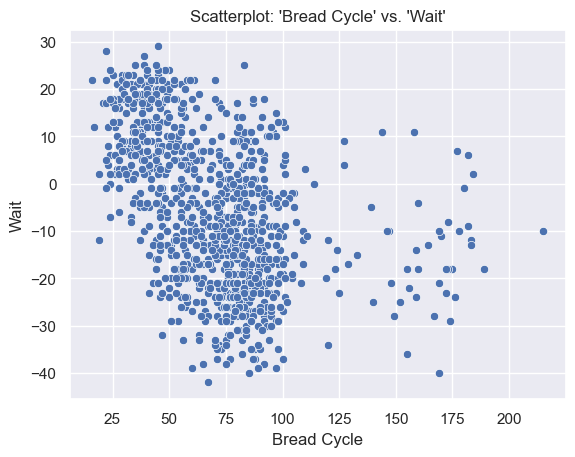

In [86]:
sns.scatterplot(data = store.sample(1000), x = 'Bread_CT', y = 'Wait')
plt.xlabel('Bread Cycle')
plt.ylabel('Wait')
plt.title("Scatterplot: 'Bread Cycle' vs. 'Wait'")

print()

# Model Creation

In [47]:
import statsmodels.formula.api as smf

In [48]:
equation_1 = 'Wait ~ Bread_CT' #for more complex models, we can add additional columns using the '+' symbol

In [51]:
model_1 = smf.ols(equation_1, store).fit()
model_1

# Understanding the Slope and Y-Intercept

In [58]:
model_1.params

Intercept    9.634135
Bread_CT    -0.231077
dtype: float64

In [67]:
intercept = model_1.params['Intercept']
intercept

9.634135490606946

In [66]:
slope = model_1.params['Bread_CT']
slope

-0.23107718943422298

In [72]:
60 * slope + intercept #this m * x + b

-4.230495875446433

In [75]:
print(store['Bread_CT'].min())
print(store['Bread_CT'].max())

5
228


In [105]:
print(5 * slope + intercept) #this is the output if we use the minimum
print(228 * slope + intercept) #this is the output if we use the maximum

8.47874954343583
-43.05146370039589


In [107]:
print(store['Wait'].max())
print(store['Wait'].min())

35
-50


In [83]:
y_pred = model_1.predict(store)
y_pred

0        0.391048
1       -0.764338
2       -8.852040
3       -0.533261
4        0.391048
           ...   
50842    2.470743
50843   -2.381878
50844   -3.075110
50845   -1.457570
50846    0.159971
Length: 50847, dtype: float64

# Plotting the model

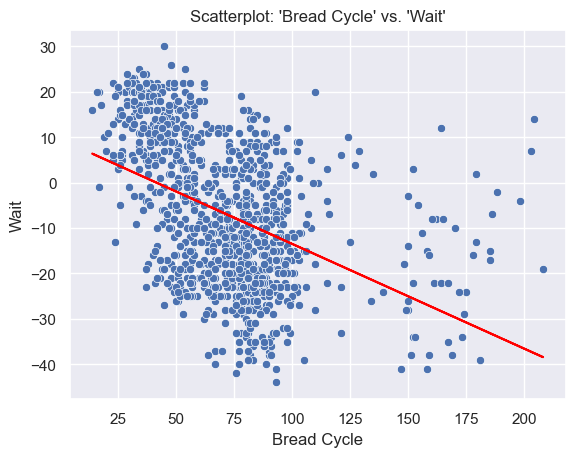

In [98]:
data_samp = store.sample(1000)
wait_pred = model_1.predict(data_samp)

sns.scatterplot(data = data_samp, x = 'Bread_CT', y = 'Wait')
plt.xlabel('Bread Cycle')
plt.ylabel('Wait')
plt.title("Scatterplot: 'Bread Cycle' vs. 'Wait'")

plt.plot(data_samp['Bread_CT'], wait_pred, color = 'red')
plt.text(0,-35,f'y = {slope: 2f}*x + {intercept: 2f}')

print()

# Model performance

In [99]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wait   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                 1.158e+04
Date:                Thu, 17 Oct 2024   Prob (F-statistic):               0.00
Time:                        01:49:41   Log-Likelihood:            -2.0681e+05
No. Observations:               50847   AIC:                         4.136e+05
Df Residuals:                   50845   BIC:                         4.136e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.6341      0.167     57.804      0.000       9.307       9.961
Bread_CT      -0.2311      0.002   -107.612      0.000      -0.235      -0.227
==============================================================================
Omnibus:                     2664.966   Durbin-Watson:                   1.527
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1056.571
Skew:                           0.060   Prob(JB):                    3.70e-230
Kurtosis:                       2.304   Cond. No.                         206.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
model_1.pvalues #check if this value is <.05

Intercept    0.0
Bread_CT     0.0
dtype: float64

In [108]:
model_1.pvalues['Bread_CT']

0.0

In [82]:
model_1.rsquared #this accounts for the % of variability that's explained by our model

0.1855062721344498

In [81]:
np.sqrt(model_1.mse_resid) #average error of our model

14.13195248537062

# Formatting

Model Results ('Bread_CT' vs. 'Wait'):
   Intercept:  9.63
   Slope: -0.23
   P-Value:  0.00
   R-Squared:  0.19
   Standard Error:  14.13



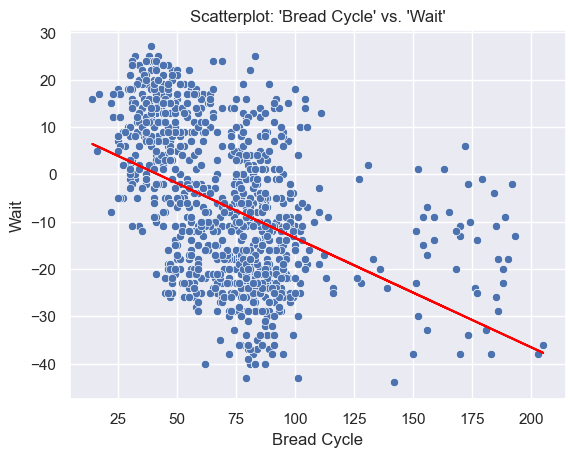

In [116]:
print("Model Results ('Bread_CT' vs. 'Wait'):")
print(f"   Intercept: {model_1.params['Intercept']: .2f}")
print(f"   Slope: {model_1.params['Bread_CT']: .2f}")
print(f"   P-Value: {model_1.pvalues['Bread_CT']: .2f}")
print(f"   R-Squared: {model_1.rsquared: .2f}")
print(f"   Standard Error: {np.sqrt(model_1.mse_resid): .2f}")

data_samp = store.sample(1000)
wait_pred = model_1.predict(data_samp)

sns.scatterplot(data = data_samp, x = 'Bread_CT', y = 'Wait')
plt.xlabel('Bread Cycle')
plt.ylabel('Wait')
plt.title("Scatterplot: 'Bread Cycle' vs. 'Wait'")

plt.plot(data_samp['Bread_CT'], wait_pred, color = 'red')

print()

# Python Exercise 7:

In [117]:
# Create simple linear regression for each of the process times vs. the wait rating.
def model_prediction(ind, dep, data):

    equation = f'{dep} ~ {ind}'
    model = smf.ols(equation, data).fit()
    
    print(f"Model Results ('{ind}' vs. '{dep}'):")
    print(f"   Intercept: {model.params['Intercept']: .2f}")
    print(f"   Slope: {model.params[ind]: .2f}")
    print(f"   P-Value: {model.pvalues[ind]: .2f}")
    print(f"   R-Squared: {model.rsquared: .2f}")
    print(f"   Standard Error: {np.sqrt(model.mse_resid): .2f}")
    
    data_samp = data.sample(1000)
    pred = model.predict(data_samp)
    
    sns.scatterplot(data = data_samp, x = ind, y = dep)
    plt.xlabel(ind)
    plt.ylabel(dep)
    plt.title(f"Scatterplot: '{ind}' vs. '{dep}'")
    
    plt.plot(data_samp[ind], pred, color = 'red')
    
    print()

Model Results ('Payment_CT' vs. 'Wait'):
   Intercept:  16.85
   Slope: -0.22
   P-Value:  0.00
   R-Squared:  0.49
   Standard Error:  11.22



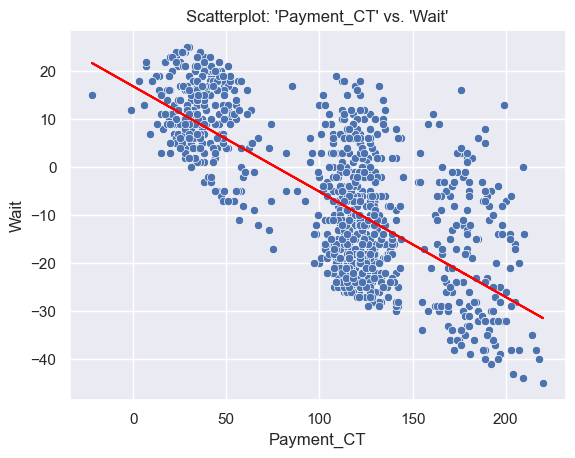

In [120]:
model_prediction('Payment_CT', 'Wait', store)

In [121]:
equation = 'Wait ~ Payment_CT'
model = smf.ols(equation, store).fit()

In [122]:
model.params

Intercept     16.846581
Payment_CT    -0.219551
dtype: float64

In [125]:
#note that our equation is 'y = m * x + b'
#written a different way: 'x = (y - b) / m'
print(f"Current payment cycle: {store['Payment_CT'].mean(): .2f}")
print(f"Target payment cycle is: {(12 - model.params['Intercept']) / model.params['Payment_CT']: .2f}")

Current payment cycle:  108.55
Target payment cycle is:  22.08


In [126]:
pd.get_dummies(store, columns = ['Shift'])

,Trans_id,Menu_id,Sand_id,Employees,Bread_CT,Cheese_CT,Protein_CT,Produce_CT,Wrap_CT,Payment_CT,...,DateTime,Month,Store,Sand,Size,Shift_Dinner,Shift_Evening,Shift_Lunch,Shift_Mid-Day,Shift_Morning
0,7141.42739.4326,1,2,1,40,41,18,71,21,39,...,2017-01-04 10:22:56.640000000,January,7141,Cold Cut,12-inch,False,False,False,False,True
1,7141.42739.4535,6,2,1,45,43,21,52,19,51,...,2017-01-04 10:53:02.400000000,January,7141,Steak,12-inch,False,False,False,False,True
2,7141.42739.4556,4,1,1,80,32,25,16,17,27,...,2017-01-04 10:56:03.840000000,January,7141,Meatball,6-inch,False,False,False,False,True
3,7141.42739.4625,3,2,1,44,60,14,49,21,81,...,2017-01-04 11:06:00.000000000,January,7141,Italian,12-inch,False,False,True,False,False
4,7141.42739.4625,7,1,2,40,20,17,68,12,52,...,2017-01-04 11:06:00.000000000,January,7141,Pastrami,6-inch,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50842,7141.43100.8813,7,1,2,31,29,20,55,14,34,...,2017-12-31 21:09:04.320000000,December,7141,Pastrami,6-inch,False,True,False,False,False
50843,7141.43100.8847,1,2,1,52,27,17,42,21,43,...,2017-12-31 21:13:58.080000000,December,7141,Cold Cut,12-inch,False,True,False,False,False
50844,7141.43100.8882,4,1,2,55,27,17,39,12,29,...,2017-12-31 21:19:00.480000000,December,7141,Meatball,6-inch,False,True,False,False,False
50845,7141.43100.8889,2,2,1,48,38,18,124,16,38,...,2017-12-31 21:20:00.960000000,December,7141,BLT,12-inch,False,True,False,False,False


# Python Exercise 8:

In [133]:
def split_data(data):
    data_shuffled = data.sample(frac=1)

        # Calculate the indices for splitting
    train_end = int(0.6 * len(data_shuffled))
    val_end = int(0.2 * len(data_shuffled)) + train_end

    # Split the dataframe
    train = data_shuffled[:train_end]
    test = data_shuffled[train_end:val_end]
    validate = data_shuffled[val_end:]

    return train, test, validate

In [135]:
train, test, validate = split_data(store)
print(store.shape)
print(train.shape)
print(test.shape)
print(validate.shape)

(50847, 32)
(30508, 32)
(10169, 32)
(10170, 32)
